# import

In [53]:
%run functions.ipynb
from sklearn.preprocessing import StandardScaler
from itertools import combinations
from scipy.stats import chi2_contingency
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# fonctions 

In [54]:

import numpy as np

def display_boxplot(metric):
    responders = []
    non_responders = []

    for _,row in df_all_segments_stats.iterrows():
        if row["statut"] == "responder" :
            responders.append(row[metric])
        if row["statut"] == "non responder" :
            non_responders.append(row[metric])

    responders = np.asarray(responders, dtype=float)
    non_responders = np.asarray(non_responders, dtype=float)

    print("responder = ", responders)
    print("non responder = ", non_responders)
    plt.boxplot([responders, non_responders],
                labels=["Répondeurs", "Non-répondeurs"])

    plt.ylabel("Pression artérielle moyenne")
    plt.title(f"boxplot {metric}")
    plt.show()


# Traitement 

In [55]:
df_basic_stats = basic_stats_patient("AA00","reponder")

df_basic_stats

,name,statut,mean,median,min,max,amplitude,var,std,q25,q75,skew,kurtosis,rms,trend_slope,pulsatility_index,auc
0,AA00_segment_1,reponder,205.160059,223.4975,36.293,358.607,322.314,4587.458093,67.730777,167.73225,246.65175,-0.772546,0.115948,215.994691,0.540297,1.571037,38320.6110
1,AA00_segment_2,reponder,215.441893,242.4600,18.493,390.888,372.395,8329.019007,91.263459,202.59300,260.51700,-0.946123,0.150995,233.888005,0.488795,1.728517,43972.3640
2,AA00_segment_3,reponder,212.925902,218.0970,69.562,354.163,284.601,3991.460487,63.178006,176.14825,263.78500,-0.472030,-0.344311,222.033019,-0.670045,1.336620,27893.2325
3,AA00_segment_4,reponder,10.896673,0.0000,0.000,695.828,695.828,3124.376345,55.896121,0.00000,0.00000,5.738220,36.691617,56.933851,-0.024998,63.856922,20442.2755
4,AA00_segment_5,reponder,143.233437,143.0050,41.168,261.702,220.534,928.381876,30.469360,128.02400,159.00200,-0.358372,2.111150,146.430274,0.001984,1.539682,55892.3655
5,AA00_tout,reponder,66.740325,0.0000,0.000,695.828,695.828,10149.698807,100.745714,0.00000,142.16900,1.237851,0.549238,120.831935,-0.038348,10.425901,187293.5160


# toutes mes metriques 

In [56]:
df_all_segments_stats = metriquesparsegment(0)

df_all_segments_stats

C:\Users\bryan\AppData\Local\Temp\ipykernel_31100\183211363.py:158: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  slope = linregress(t, x).slope
C:\Users\bryan\AppData\Roaming\Python\Python313\site-packages\numpy\_core\fromnumeric.py:3860: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\bryan\AppData\Roaming\Python\Python313\site-packages\numpy\_core\_methods.py:144: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


======== ED06 =========
Erreur pour ED06 : zero-size array to reduction operation minimum which has no identity


,name,statut,mean,median,min,max,amplitude,var,std,q25,q75,skew,kurtosis,rms,trend_slope,pulsatility_index,auc
0,AA00_tout,NaN,66.740325,0.0000,0.000,695.828,695.828,10149.698807,100.745714,0.00000,142.16900,1.237851,0.549238,120.831935,-0.038348,10.425901,1.872935e+05
1,AB01_tout,responder,47.467228,45.9165,16.855,271.461,254.606,212.731321,14.585312,39.86000,53.18225,5.236994,61.257142,49.656777,-0.004232,5.363827,1.373224e+05
2,AC02_tout,responder,41.791995,37.9520,25.871,139.924,114.053,183.749479,13.555422,31.73425,51.69175,1.724530,6.636682,43.930680,0.066786,2.729063,1.842792e+04
3,AD03_tout,non responder,150.421151,152.5810,17.689,438.639,420.950,2426.424524,49.258751,113.06050,183.20225,0.411188,0.732908,158.277949,-0.025682,2.798476,3.514666e+05
4,AD04_tout,responder,15.128894,11.6210,5.047,153.734,148.687,122.860304,11.084237,7.84600,17.83800,3.345380,24.940862,18.751847,0.011057,9.828015,1.657417e+04
5,AE05_tout,non responder,234.239714,235.7880,0.000,480.317,480.317,11428.320527,106.903323,144.70200,329.26550,-0.119334,-1.139912,257.474331,-0.065473,2.050536,7.575321e+05
6,AE06_tout,responder,145.708869,147.4835,14.483,484.176,469.693,3540.892082,59.505395,101.70050,183.36650,0.280551,0.184727,157.387443,0.021317,3.223503,4.448052e+05
7,AE07_tout,non responder,-6.518655,-9.9325,-167.434,113.675,281.109,1989.319236,44.601785,-36.45275,22.68325,0.096114,-0.053004,45.061986,-0.069188,-43.123776,-1.055316e+04
8,AF08_tout,responder,694.787144,683.5790,507.727,996.978,489.251,11808.468641,108.666778,595.00700,764.94800,0.493067,-0.685014,703.229686,0.168992,0.704174,1.450670e+06
9,BB01_tout,responder,321.892754,360.9575,0.000,531.137,531.137,11207.838837,105.867081,235.85250,400.63650,-0.632272,-0.549368,338.851525,0.051853,1.650043,1.485478e+06


# test pour choisir les meilleurs metriques 

In [57]:
"""
Ce script explore de manière exhaustive les combinaisons de métriques
statistiques extraites des signaux physiologiques afin d’identifier
des sous-ensembles de variables capables de séparer les patients
répondeurs et non-répondeurs.

Pour chaque combinaison de métriques :
- les données sont normalisées,
- un clustering non supervisé (K-means, k=2) est appliqué,
- l’association entre les clusters obtenus et le statut clinique
  est évaluée à l’aide d’un test du Chi-deux.

Les combinaisons présentant une association statistiquement significative
(p < 0.1) sont affichées comme candidates potentiellement discriminantes.
"""

liste = [column for column in df_all_segments_stats.columns if column != "name" and column != "statut"]

for i in range(2,len(liste)+1):
    resultat = [list(c) for c in combinations(liste, i)]

    for column in resultat :
        df_segments_stats = df_all_segments_stats[column]

        # normalisation
        X = df_segments_stats
        scaler = StandardScaler()
        X_scaled = scaler.fit_transform(X)

        # clustering par  k means
        kmeans = KMeans(n_clusters=2, random_state=42)
        clusters = kmeans.fit_predict(X_scaled)

        df_all_segments_stats["cluster"] = clusters
        
        # Évaluation de la séparation
        contingency = pd.crosstab(df_all_segments_stats["cluster"], df_all_segments_stats["statut"])
        chi2, p, _, _ = chi2_contingency(contingency)
        if p < 0.1:
            print( column ,":", p)
        

['max', 'amplitude', 'trend_slope', 'pulsatility_index'] : 0.09252685813324009


In [ ]:
# apres avoir obtenue une liste de metrique avec un bon p value on poursuit le travail avec cette liste 

df_segments_stats = df_all_segments_stats[['max', 'amplitude', 'trend_slope', 'pulsatility_index']]
df_segments_stats

,max,amplitude,trend_slope,pulsatility_index
0,695.828,695.828,-0.038348,10.425901
1,271.461,254.606,-0.004232,5.363827
2,139.924,114.053,0.066786,2.729063
3,438.639,420.950,-0.025682,2.798476
4,153.734,148.687,0.011057,9.828015
5,480.317,480.317,-0.065473,2.050536
6,484.176,469.693,0.021317,3.223503
7,113.675,281.109,-0.069188,-43.123776
8,996.978,489.251,0.168992,0.704174
9,531.137,531.137,0.051853,1.650043


# choix du meilleur k

In [59]:
# normalisation 

X = df_segments_stats
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_scaled


array([[ 1.10636773,  1.38062743, -0.88627561,  0.03774563],
       [-0.45970153, -0.48287718, -0.31928806, -0.20468113],
       [-0.94512111, -1.07650389,  0.86099594, -0.33086208],
       [ 0.15724636,  0.21967802, -0.67576904, -0.32753785],
       [-0.89415717, -0.93022692, -0.06519204,  0.00911241],
       [ 0.31105341,  0.47041502, -1.3370813 , -0.36335729],
       [ 0.32529453,  0.42554447,  0.10532294, -0.30718296],
       [-1.04198951, -0.37094155, -1.39882134, -2.52679133],
       [ 2.21772125,  0.50814784,  2.55959893, -0.42783566],
       [ 0.49859778,  0.68505369,  0.61280889, -0.38253721],
       [ 0.02443381,  0.09310794, -0.12564391, -0.01374228],
       [-0.03750898,  0.05267629, -0.24611728,  0.61100291],
       [-0.95814072, -1.04375903,  0.09706156, -0.32255341],
       [ 1.49516248,  1.82559089, -0.39052688, -0.33519246],
       [ 1.01263245,  1.27335033, -0.16802132,  0.45110935],
       [-0.75871338, -0.84087016, -0.83496666, -0.35303394],
       [-0.11637208, -0.

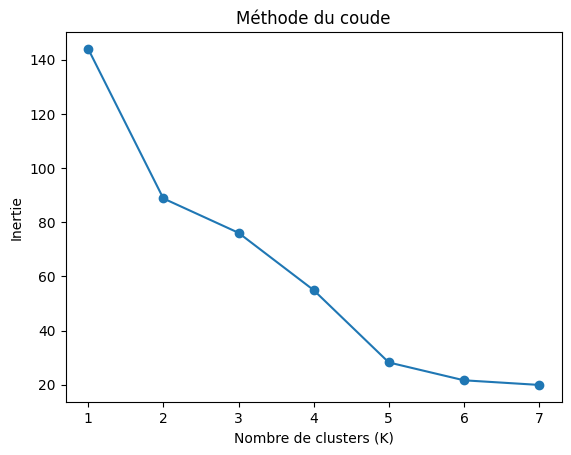

In [60]:

# methode du coude 
inertia = []

for k in range(1, 8):
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X_scaled)
    inertia.append(km.inertia_)

plt.plot(range(1, 8), inertia, marker='o')
plt.xlabel("Nombre de clusters (K)")
plt.ylabel("Inertie")
plt.title("Méthode du coude")
plt.show()


prendre k = 2 car c'est la qu'on observe la première cassure 


In [61]:
kmeans = KMeans(n_clusters=2, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

df_all_segments_stats["cluster"] = clusters


# proportion entre les clusters 


In [62]:
pd.crosstab(df_all_segments_stats["cluster"], df_all_segments_stats["statut"], normalize='index')


statut,non responder,responder
cluster,,
0,0.083333,0.916667
1,0.428571,0.571429


In [63]:
from scipy.stats import chi2_contingency

contingency = pd.crosstab(df_all_segments_stats["cluster"], df_all_segments_stats["statut"])
chi2, p, _, _ = chi2_contingency(contingency)
print(p)

0.09252685813324009


In [64]:
df_all_segments_stats.groupby("cluster")[['trend_slope', 'pulsatility_index']].mean()


,trend_slope,pulsatility_index
cluster,,
0,0.031583,20.275482
1,0.005595,3.625104


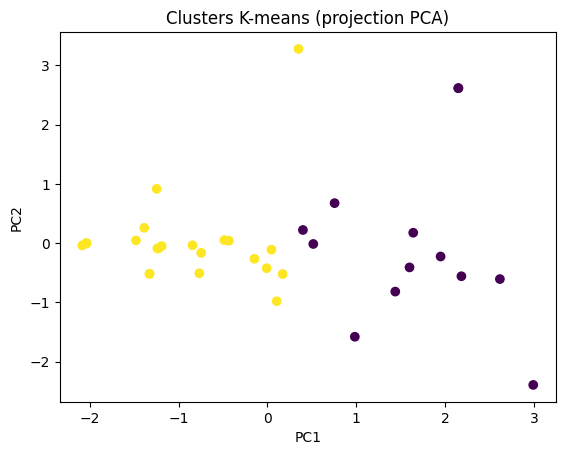

In [65]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.scatter(X_pca[:,0], X_pca[:,1], c=clusters)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Clusters K-means (projection PCA)")
plt.show()
